# Explore here

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import *


In [61]:

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv",sep=";")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [62]:
df.shape

(41188, 21)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [64]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

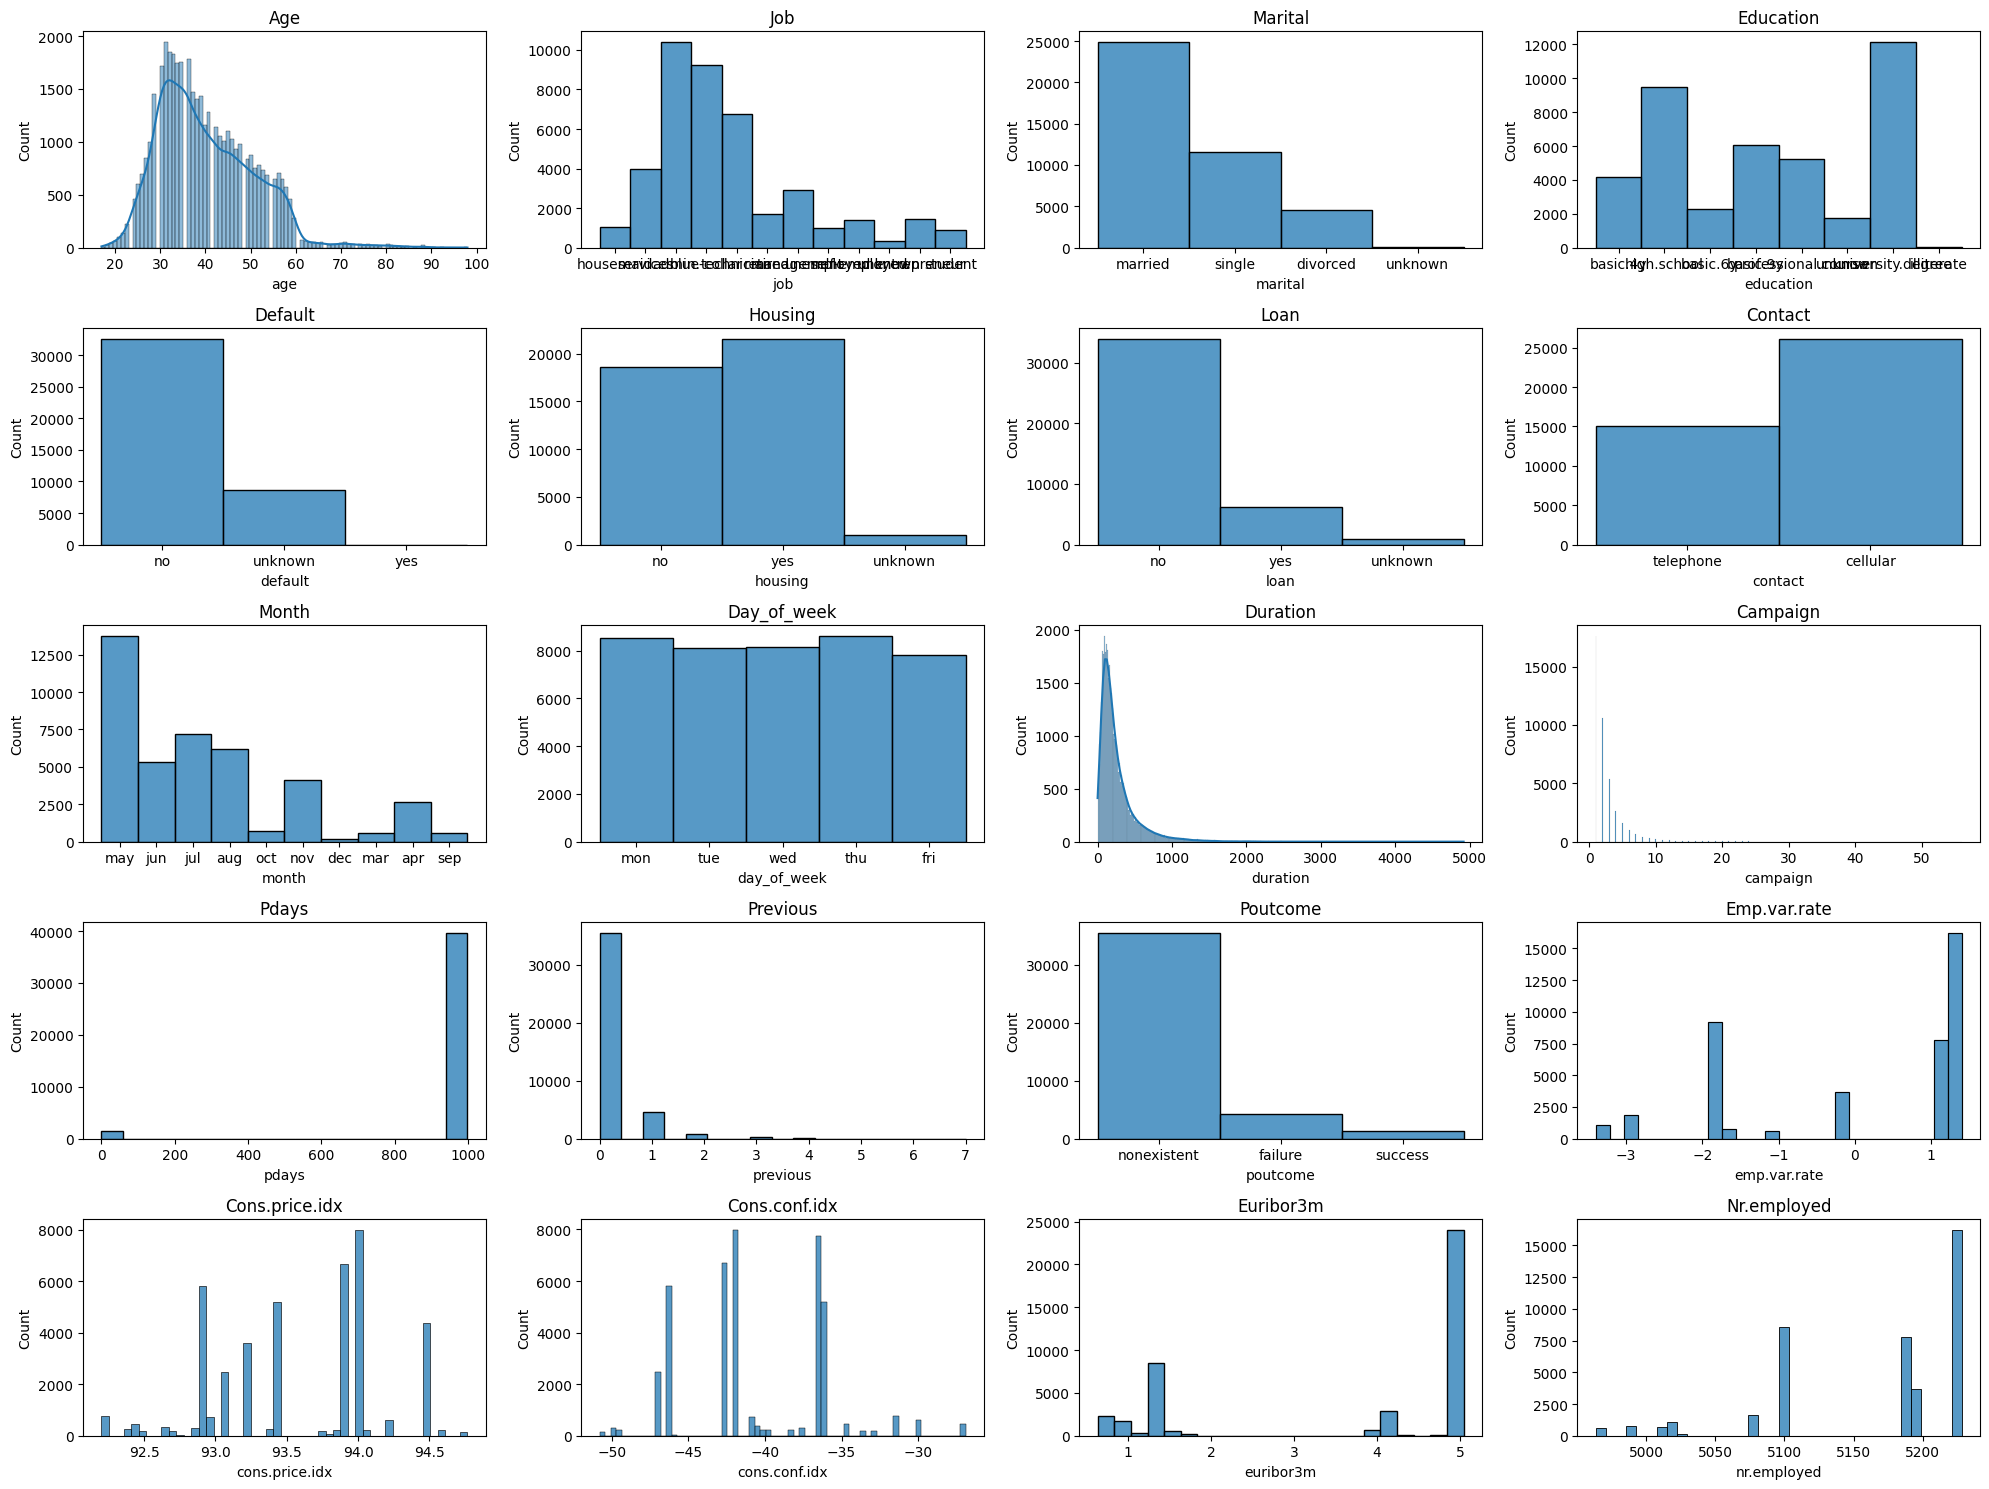

In [65]:


fig, axis = plt.subplots(5, 4, figsize = (20, 15))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=df, x="age", kde=True)
axis[0, 0].set_title("Age")

sns.histplot(ax=axis[0, 1], data=df, x="job")
axis[0, 1].set_title("Job")

sns.histplot(ax=axis[0, 2], data=df, x="marital")
axis[0, 2].set_title("Marital")

sns.histplot(ax=axis[0, 3], data=df, x="education")
axis[0, 3].set_title("Education")

sns.histplot(ax=axis[1, 0], data=df, x="default")
axis[1, 0].set_title("Default")

sns.histplot(ax=axis[1, 1], data=df, x="housing")
axis[1, 1].set_title("Housing")

sns.histplot(ax=axis[1, 2], data=df, x="loan")
axis[1, 2].set_title("Loan")

sns.histplot(ax=axis[1, 3], data=df, x="contact")
axis[1, 3].set_title("Contact")

sns.histplot(ax=axis[2, 0], data=df, x="month")
axis[2, 0].set_title("Month")

sns.histplot(ax=axis[2, 1], data=df, x="day_of_week")
axis[2, 1].set_title("Day_of_week")

sns.histplot(ax=axis[2, 2], data=df, x="duration", kde=True)
axis[2, 2].set_title("Duration")

sns.histplot(ax=axis[2, 3], data=df, x="campaign")
axis[2, 3].set_title("Campaign")

sns.histplot(ax=axis[3, 0], data=df, x="pdays")
axis[3, 0].set_title("Pdays")

sns.histplot(ax=axis[3, 1], data=df, x="previous")
axis[3, 1].set_title("Previous")

sns.histplot(ax=axis[3, 2], data=df, x="poutcome")
axis[3, 2].set_title("Poutcome")

sns.histplot(ax=axis[3, 3], data=df, x="emp.var.rate")
axis[3, 3].set_title("Emp.var.rate")

sns.histplot(ax=axis[4, 0], data=df, x="cons.price.idx")
axis[4, 0].set_title("Cons.price.idx")

sns.histplot(ax=axis[4, 1], data=df, x="cons.conf.idx")
axis[4, 1].set_title("Cons.conf.idx")

sns.histplot(ax=axis[4, 2], data=df, x="euribor3m")
axis[4, 2].set_title("Euribor3m")

sns.histplot(ax=axis[4, 3], data=df, x="nr.employed")
axis[4, 3].set_title("Nr.employed")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [66]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [67]:
# Factorizar los datos no numericos
df["job"] = pd.factorize(df["job"])[0]
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["day_of_week"] = pd.factorize(df["day_of_week"])[0]
df["default"] = pd.factorize(df["default"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["contact"] = pd.factorize(df["contact"])[0]
df["month"] = pd.factorize(df["month"])[0]
df["poutcome"] = pd.factorize(df["poutcome"])[0]
df["y"] = pd.factorize(df["y"])[0]

In [68]:
# Separamos las variables independientes de la dependiente
X = df.drop(['y'], axis=1)
y = df['y']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [69]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [70]:
# Inicializar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [71]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 1, 0], shape=(8238,))

In [72]:
accuracy_score(y_test, y_pred)

0.9077445982034474

In [73]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
df_xgb = pd.DataFrame({'Feature':X_train_scaled.columns, 'Importance':xgb_model.feature_importances_*100})
df_xgb = df_xgb.sort_values(by='Importance', ascending=False)
df_xgb

,Feature,Importance
19,nr.employed,70.127533
10,duration,5.012896
15,emp.var.rate,3.489702
8,month,3.178014
12,pdays,2.361776
16,cons.price.idx,1.806296
4,default,1.715700
7,contact,1.662487
14,poutcome,1.529368
18,euribor3m,1.351977


In [74]:
df_xgb_filtered = df_xgb[df_xgb['Importance'] >= 1]

In [75]:
df_xgb_filtered.head(5)

,Feature,Importance
19,nr.employed,70.127533
10,duration,5.012896
15,emp.var.rate,3.489702
8,month,3.178014
12,pdays,2.361776


In [76]:
# Obtener las características a mantener (con importancia >= 1%)
categorias_valiosas = df_xgb_filtered['Feature'].tolist()



In [77]:
# Filtrar el conjunto de entrenamiento para mantener solo las características importantes
X_train_filtered = X_train_scaled[categorias_valiosas]
X_train_filtered

,nr.employed,duration,emp.var.rate,month,pdays,cons.price.idx,default,contact,poutcome,euribor3m,cons.conf.idx
12556,1.000000,0.019113,1.000000,0.222222,1.000000,0.669135,0.5,0.0,0.0,0.980730,0.338912
35451,0.512287,0.023587,0.333333,0.000000,1.000000,0.269680,0.0,1.0,0.0,0.138291,0.192469
30592,0.512287,0.002643,0.333333,0.000000,1.000000,0.269680,0.0,1.0,0.5,0.163228,0.192469
17914,1.000000,0.019113,1.000000,0.222222,1.000000,0.669135,0.0,1.0,0.0,0.980957,0.338912
3315,0.859735,0.069947,0.937500,0.000000,1.000000,0.698753,0.5,0.0,0.0,0.958059,0.602510
...,...,...,...,...,...,...,...,...,...,...,...
6265,0.859735,0.086824,0.937500,0.000000,1.000000,0.698753,0.5,0.0,0.0,0.957379,0.602510
11284,1.000000,0.058560,1.000000,0.111111,1.000000,0.882307,0.0,0.0,0.0,0.980957,0.376569
38158,0.203781,0.039447,0.000000,0.444444,0.004004,0.089634,0.0,1.0,1.0,0.027205,1.000000
860,0.859735,0.059984,0.937500,0.000000,1.000000,0.698753,0.0,0.0,0.0,0.957153,0.602510


In [78]:
# Filtrar el conjunto de entrenamiento para mantener solo las características importantes
X_test_filtered = X_test_scaled[categorias_valiosas]
X_test_filtered

,nr.employed,duration,emp.var.rate,month,pdays,cons.price.idx,default,contact,poutcome,euribor3m,cons.conf.idx
32884,0.512287,0.075437,0.333333,0.000000,1.0,0.269680,0.0,1.0,0.5,0.150759,0.192469
3169,0.859735,0.057950,0.937500,0.000000,1.0,0.698753,0.5,0.0,0.0,0.958059,0.602510
32206,0.512287,0.010573,0.333333,0.000000,1.0,0.269680,0.0,1.0,0.5,0.153933,0.192469
9403,1.000000,0.072184,1.000000,0.111111,1.0,0.882307,0.0,0.0,0.0,0.982317,0.376569
14020,1.000000,0.038430,1.000000,0.222222,1.0,0.669135,0.0,1.0,0.0,0.981410,0.338912
...,...,...,...,...,...,...,...,...,...,...,...
12322,1.000000,0.118747,1.000000,0.222222,1.0,0.669135,0.5,0.0,0.0,0.980503,0.338912
23440,1.000000,0.033957,1.000000,0.333333,1.0,0.484412,0.0,1.0,0.0,0.981637,0.615063
29431,0.512287,0.028874,0.333333,0.888889,1.0,0.340608,0.0,1.0,0.5,0.174790,0.154812
16627,1.000000,0.269825,1.000000,0.222222,1.0,0.669135,0.0,1.0,0.0,0.981410,0.338912


In [79]:
# Inicializar el modelo de regresión logística
model2 = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model2.fit(X_train_filtered, y_train)

LogisticRegression()

In [80]:
y_pred = model2.predict(X_test_filtered)
y_pred


array([0, 0, 0, ..., 0, 1, 0], shape=(8238,))

In [81]:
accuracy_score(y_test, y_pred)

0.9077445982034474

In [85]:
model = LogisticRegression(random_state=42)

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    "penalty": ["l1", "l2", "elasticnet", None],  
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]  
}

random_search = RandomizedSearchCV(
    model, hyperparams, scoring="accuracy", cv=10, random_state=42
)

random_search.fit(X_train_filtered, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: U

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [88]:
# Mostrar los mejores parámetros y la mejor precisión obtenida durante la búsqueda
print("Mejores Hiperparámetros:", random_search.best_params_)
print("Mejor Precisión en CV:", random_search.best_score_)



Mejores Hiperparámetros: {'solver': 'sag', 'penalty': 'l2', 'C': 100}
Mejor Precisión en CV: 0.9094385432473446


In [90]:
# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_filtered)

# Calcular la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", test_accuracy)

Precisión en el conjunto de prueba: 0.9081087642631707
